# Loan Application Approval 

To determine the outcome of a loan application for Dream Housing company based on the data provided in the loan application, it will be helpful to resolve the best method for handling columns with missing values. As seen in the Data Wrangling, the percentage of missing values in the Credit_History and Self_Employed amounts to 8% and 5% respectively. Where it may be helpful to drop NaN values in some instances, it may be useful to note the response to the loan approval based on the absence of this information in the application. Additionally, coming to a consensus on the best method for dealing with a data set with such a large number of categorical variables will be key in determining the best modeling approach. 

In [2]:
#import necessary packages 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
loan_data = pd.read_csv('../CapstoneProject2/data/train_ctrUa4K.csv')

In [4]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
household_income = loan_data['CoapplicantIncome'] + loan_data['ApplicantIncome']
loan_data['HouseholdIncome'] = household_income

---First, separating the results of the applications between approval where Y is Yes and N is No, in order to note the mean applicant and co-applicant income for each variable. Does the household income seem to have an affect on the number of loans that are approved?--- 

In [6]:
LA_N = loan_data[loan_data['Loan_Status'] != 'Y']
LA_Y = loan_data[loan_data['Loan_Status'] != 'N']

In [7]:
LA_N

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,HouseholdIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,4693.0
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,3510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N,7383.0
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N,2987.0
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,42083.0
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N,6200.0


In [8]:
LA_N['HouseholdIncome'].describe()

count      192.000000
mean      7323.885417
std       7739.774247
min       1442.000000
25%       4162.750000
50%       5289.500000
75%       7570.750000
max      81000.000000
Name: HouseholdIncome, dtype: float64

In [9]:
 LA_Y['HouseholdIncome'].describe()

count      422.000000
mean      6888.585118
std       5788.062269
min       1963.000000
25%       4188.750000
50%       5439.000000
75%       7452.500000
max      63337.000000
Name: HouseholdIncome, dtype: float64

(array([36., 91., 97., 75., 34., 18., 23., 13.,  5.,  3.,  6.,  5.,  4.,
         2.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1963.  ,  3190.48,  4417.96,  5645.44,  6872.92,  8100.4 ,
         9327.88, 10555.36, 11782.84, 13010.32, 14237.8 , 15465.28,
        16692.76, 17920.24, 19147.72, 20375.2 , 21602.68, 22830.16,
        24057.64, 25285.12, 26512.6 , 27740.08, 28967.56, 30195.04,
        31422.52, 32650.  , 33877.48, 35104.96, 36332.44, 37559.92,
        38787.4 , 40014.88, 41242.36, 42469.84, 43697.32, 44924.8 ,
        46152.28, 47379.76, 48607.24, 49834.72, 51062.2 , 52289.68,
        53517.16, 54744.64, 55972.12, 57199.6 , 58427.08, 59654.56,
        60882.04, 62109.52, 63337.  ]),
 <BarContainer object of 50 artists>)

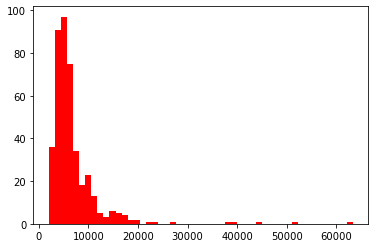

In [10]:
plt.hist(LA_Y['HouseholdIncome'], bins=50, color='red')

(array([20., 49., 50., 29., 12.,  7.,  6.,  3.,  3.,  3.,  1.,  1.,  2.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1442.  ,  3033.16,  4624.32,  6215.48,  7806.64,  9397.8 ,
        10988.96, 12580.12, 14171.28, 15762.44, 17353.6 , 18944.76,
        20535.92, 22127.08, 23718.24, 25309.4 , 26900.56, 28491.72,
        30082.88, 31674.04, 33265.2 , 34856.36, 36447.52, 38038.68,
        39629.84, 41221.  , 42812.16, 44403.32, 45994.48, 47585.64,
        49176.8 , 50767.96, 52359.12, 53950.28, 55541.44, 57132.6 ,
        58723.76, 60314.92, 61906.08, 63497.24, 65088.4 , 66679.56,
        68270.72, 69861.88, 71453.04, 73044.2 , 74635.36, 76226.52,
        77817.68, 79408.84, 81000.  ]),
 <BarContainer object of 50 artists>)

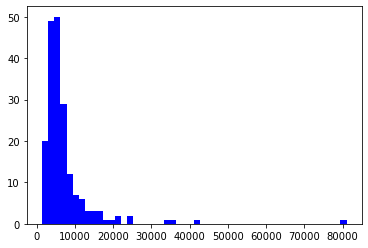

In [11]:
plt.hist(LA_N['HouseholdIncome'], bins=50, color='Blue')

---As we can see, the mean household income for both approved and unapproved loans is not significantly different. If anything, the loans that were not approved seem to have applicants who have a greater monthly income than applicants who have been approved. We see in both histograms that the vast majority of monthly earnings lie below $10000 a month, with a few outliers. It is interesting to note that the highest monthly earnings, $80,000, were denied! Perhaps monthly earnings is not as valuable a category by itself as much as debt to income ratio. Is there a way to calculate the debt to income ratio with our data set?--- 

In [12]:
loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
HouseholdIncome      554
dtype: int64

---When noting the null values in the data set, I remember the numerical columns 'LoanAmount' and 'Loan_Amount_Term' had 3.5% and 2.25% missing values, respectively. Due to the nature of those numerical values, imputing the mean of the column into each of the missing values would be beneficial to our eventual modeling.---

In [13]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
HouseholdIncome       0
dtype: int64

In [21]:
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())

---Above I sought to remedy the null values in the LoanAmount and Loan_Amount_Term columns by imputing the mean value of each column into each missing value. This could potentially make the data behave more reliably in my model and should provide me with more insight as I further explore the data. It would be worthwhile to check the distribution of the LoanAmount Data as well as the Loan_Amount_Term data.--- 

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

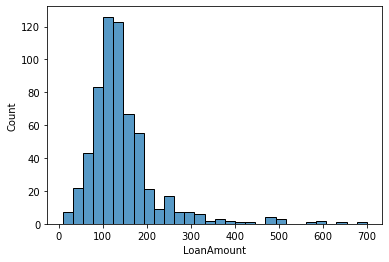

In [43]:
sns.histplot(loan_data['LoanAmount'], bins=30)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

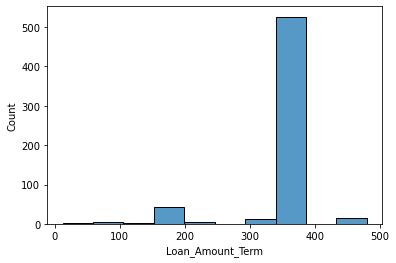

In [45]:
sns.histplot(loan_data['Loan_Amount_Term'], bins=10)

---The distribution of the first histogram of the LoanAmount data clearly shows that the majority of the loan amounts lie between $80,000 and $200,000, with over 200 of the applications being for $100,000-140,000. The second histogram shows that over 500 of the applications were for 360 months, or a 30-year term, making that the clear favorite term amount.---

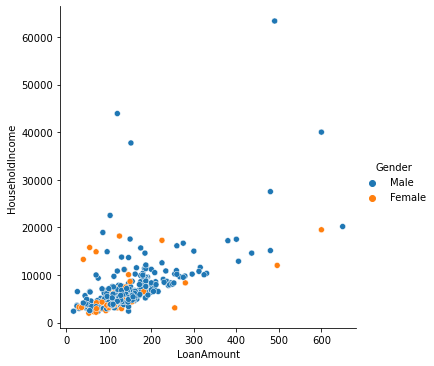

In [49]:
sns.relplot(x='LoanAmount', y=LA_Y['HouseholdIncome'], hue='Gender', data=loan_data)

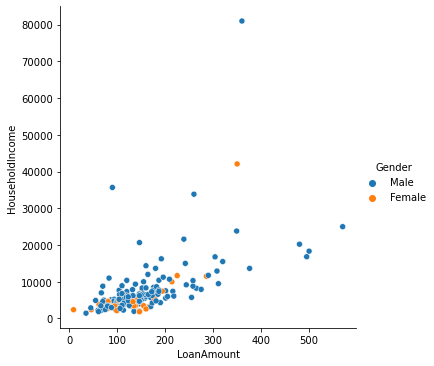

In [50]:
sns.relplot(x='LoanAmount', y=LA_N['HouseholdIncome'], hue='Gender', data=loan_data)

---In the above plots, I thought it worthwhile to explore some of the categorical variables like Gender, initially, to see whether or not they are significant in determining the outcome of the loan application based on Household Income and Loan Amount. The loan applicants are most often male, and it appears that the distribution between both the approved and the denied applications are relatively similar.---

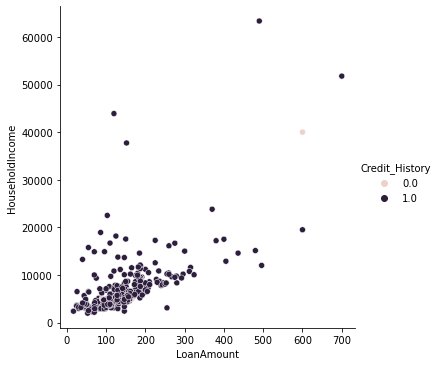

In [51]:
sns.relplot(x='LoanAmount', y=LA_Y['HouseholdIncome'], hue='Credit_History', data=loan_data)

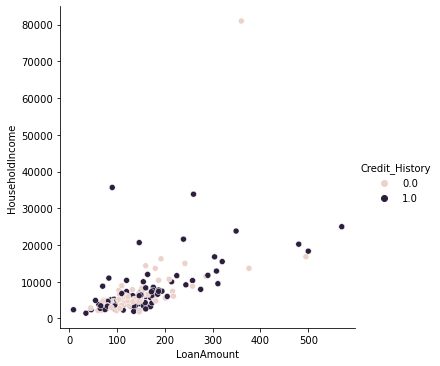

In [53]:
sns.relplot(x='LoanAmount', y=LA_N['HouseholdIncome'], hue='Credit_History', data=loan_data)

---In the above plots it is interesting to note that number of applicants whose credit history information did not meet the necessary requirements is higher in the denied applications than in the approved applications. Thus, it would be reasonable to hypothesize the following: Not meeting the credit history requirements is more likely to lead to your loan application being denied.---

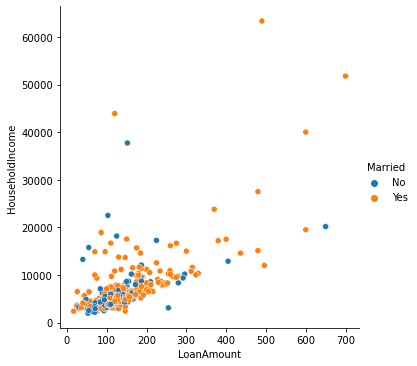

In [54]:
sns.relplot(x='LoanAmount', y=LA_Y['HouseholdIncome'], hue='Married', data=loan_data)

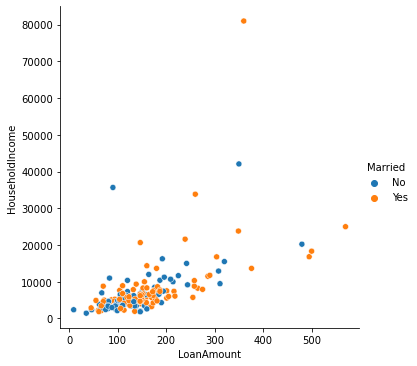

In [55]:
sns.relplot(x='LoanAmount', y=LA_N['HouseholdIncome'], hue='Married', data=loan_data)

---It can be gathered from the above histograms that marriage seems to have little impact on whether or not you may be approved for a loan, as both the approved and denied applications have a similar ratio of married to unmarried applicants. Perhaps the categorical variable 'Married' is unnecessary.---

I believe that the best way to determine the outcome of a loan application will depend on the applicant meeting the Credit History requirements. In addition, it will be important to note the Loan Amount, the Term length of the Loan and whether